In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import rna_utils as ru

DIST_PATH = "../../data/rnadist_f_all.h5"
META_PATH = "../../data/sources/ArchiveII_with_prob_and_motiv.csv"
dist, meta = ru.load_and_align(corr_path=DIST_PATH, meta_path=META_PATH)

threshold = 100
SAVE_PATH = f"../../data/rnadist_filtered{str(threshold)}.h5"
SAVE_KEY = f"filtered_dist{str(threshold)}"

In [11]:
fams = ru.build_intra_fam_corrs(dist, meta)
print(fams["tRNA"].shape)
print(fams.keys())
print(meta.groupby("fam")['sequence'].count())

(557, 557)
dict_keys(['16s', '23s', '5s', 'RNaseP', 'grp1', 'srp', 'tRNA', 'telomerase', 'tmRNA'])
fam
16s             66
23s             15
5s            1283
RNaseP         454
grp1            74
srp            918
tRNA           557
telomerase      35
tmRNA          462
Name: sequence, dtype: int64


In [12]:
# 2) sub-matrices por familia
distances = ru.build_intra_fam_corrs(dist, meta)
corrs_summary = ru.summary_table(distances)
display(corrs_summary)

,Fam,n_seq,mean_dist,min_dist,max_dist
0,5s,1283,0.162269,0.000000,0.620690
1,srp,918,0.581805,0.000000,1.406250
2,tRNA,557,0.120029,0.000000,0.728571
3,tmRNA,462,0.302295,0.000000,0.838983
4,RNaseP,454,0.469125,0.000000,1.040302
5,grp1,74,0.505802,0.000000,1.028340
6,16s,66,0.632086,0.013928,1.272727
7,telomerase,35,0.290160,0.002252,0.503778
8,23s,15,0.572299,0.007692,0.824926


In [13]:
df_flitered = ru.filter_struc_by_count_dict(distances, data_size=threshold)

df_flitered_summary = ru.summary_table(df_flitered)
display(df_flitered_summary)

Initial shape: 66^2
Data size (100) is larger than matrix size (66), ignoring family.
Initial shape: 15^2
Data size (100) is larger than matrix size (15), ignoring family.
Initial shape: 1283^2
Data size set to 100, ignoring percentile. Target percentile: 7.79423226812159
Final shape: (100, 100), min_val: 0.09322033898305085
Initial shape: 454^2
Data size set to 100, ignoring percentile. Target percentile: 22.026431718061673
Final shape: (100, 100), min_val: 0.2078853046594982
Initial shape: 74^2
Data size (100) is larger than matrix size (74), ignoring family.
Initial shape: 918^2
Data size set to 100, ignoring percentile. Target percentile: 10.893246187363834
Final shape: (100, 100), min_val: 0.2916666666666667
Initial shape: 557^2
Data size set to 100, ignoring percentile. Target percentile: 17.953321364452425
Final shape: (100, 100), min_val: 0.03409090909090909
Initial shape: 35^2
Data size (100) is larger than matrix size (35), ignoring family.
Initial shape: 462^2
Data size set 

,Fam,n_seq,mean_dist,min_dist,max_dist
0,5s,100,0.264081,0.093220,0.588235
1,tmRNA,100,0.373195,0.188095,0.838983
2,RNaseP,100,0.580295,0.207951,0.982759
3,tRNA,100,0.213008,0.034884,0.728571
4,srp,100,0.643320,0.292063,1.188073
5,grp1,74,0.505802,0.000000,1.028340
6,16s,66,0.632086,0.013928,1.272727
7,telomerase,35,0.290160,0.002252,0.503778
8,23s,15,0.572299,0.007692,0.824926


In [14]:
# 4) resumen tabular
corrs_filt_summary = ru.summary_table(df_flitered)
print(60 * "-")
print(corrs_filt_summary.n_seq.sum().item())
print(100 * corrs_filt_summary.n_seq.sum().item() / corrs_summary.n_seq.sum().item())
display(corrs_filt_summary)
print(60 * "-")
display(ru.relative_summary_table(corrs_summary, corrs_filt_summary))

------------------------------------------------------------
690
17.857142857142858


,Fam,n_seq,mean_dist,min_dist,max_dist
0,5s,100,0.264081,0.093220,0.588235
1,tmRNA,100,0.373195,0.188095,0.838983
2,RNaseP,100,0.580295,0.207951,0.982759
3,tRNA,100,0.213008,0.034884,0.728571
4,srp,100,0.643320,0.292063,1.188073
5,grp1,74,0.505802,0.000000,1.028340
6,16s,66,0.632086,0.013928,1.272727
7,telomerase,35,0.290160,0.002252,0.503778
8,23s,15,0.572299,0.007692,0.824926


------------------------------------------------------------


,Fam,%n_seq,r_min_variation,r_mean_variaton
0,5s,7.794232,inf,1.627429
1,srp,10.893246,inf,0.641444
2,tRNA,17.953321,inf,4.834630
3,tmRNA,21.645022,inf,0.704636
4,RNaseP,22.026432,inf,1.371319
5,grp1,100.000000,NaN,1.000000
6,16s,100.000000,1.0,1.000000
7,telomerase,100.000000,1.0,1.000000
8,23s,100.000000,1.0,1.000000


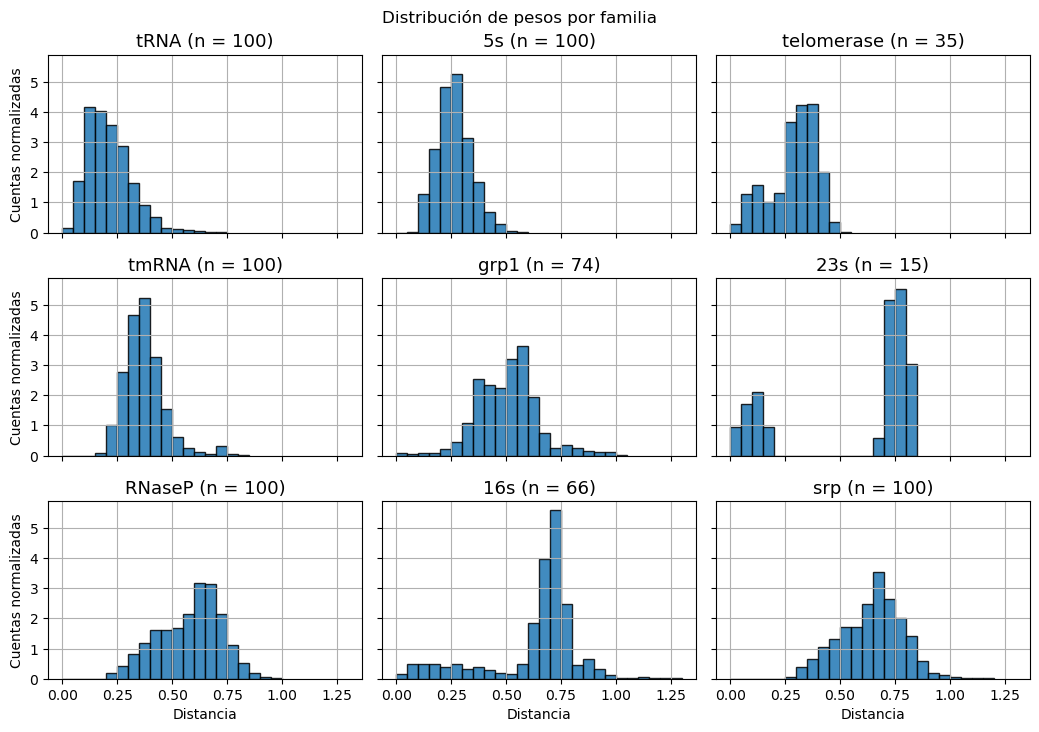

In [15]:

# 6) solo histogramas (todas las familias)
ru.plot_histograms(df_flitered, bin_width=0.05)

In [16]:
# 1. Obtener el conjunto de todos los IDs usados en todos los DataFrames del diccionario
all_ids = set()
for df in df_flitered.values():
    all_ids.update(df.index)

# 2. Convertir a lista ordenada si querés controlar el orden
all_ids = sorted(all_ids)

# 3. Subseleccionar el DataFrame original
df_flitered_dist = dist.loc[all_ids, all_ids]

# 4. (Opcional) Verificar que la matriz resultante es cuadrada y simétrica
assert df_flitered_dist.shape[0] == df_flitered_dist.shape[1]
assert (df_flitered_dist.values == df_flitered_dist.values.T).all()

# 5. Ahora `filtered_corr` es el nuevo DataFrame con sólo los IDs usados
print(df_flitered_dist.shape)

(690, 690)


In [17]:
df_flitered_dist.to_hdf(SAVE_PATH, key=SAVE_KEY, mode="w")